<div style="
            border: 1px solid grey;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; 
             background: linear-gradient(to right, #00b09b, #96c93d);">
    <i class="fa-play fa"
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;">
    </i>
    <div>
     <font color="white">To run the **selected** code cell, hit Ctrl + Enter</font>
    </div>
</div>





<div style="background: linear-gradient(to right, #007991, #78ffd6);
            border: 1px solid black;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
            
                 <i class="fa fa-flag-o";
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
        
     
 
<font color='white'><center>**STEP 1: LOAD OCTAVE PACKAGES AND NIFTI READER.**</center></font> 
            <i class="fa fa-angle-double-down"
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
    <div>
   
    </div>
    </div>

In [7]:
setNifti; 
pkg load image;
pkg load statistics; 
pkg load optim;

curdir = pwd;
cd('/home/jovyan/work');
unix('tar -xvf /home/jovyan/work/dogSC_data.tar.gz');
addpath('/home/jovyan/work/Users/Agah/Desktop/OctaveJN/scn_rscn');
cd(curdir);

error: /home/jovyan/work: No such file or directory
error: called from
    setNifti at line 3 column 1




<div style="background: linear-gradient(to right, #007991, #78ffd6);
            border: 1px solid black;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
            
                 <i class="fa fa-database";
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
        
     
 
<font color='white'><center>**STEP 2: READ DOG SPINAL CORD DATA AND DISPLAY AN EXAMPLE!**</center></font> 
            <i class="fa fa-angle-double-down"
       style="font-size: 80px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
    <div>
   
    </div>
    </div>


### <font color='darkorange'>Four different quantitative magnetization transfer methods are used:</font>
### <font color='gray'>1) Selective Inversion Recovery Fast Spin Echo (SIRFSE)</font>
### <font color='gray'>2) Spoiled Gradient Echo (SPGR)</font>
### <font color='gray'>3) Multi exponential T2: Myelin Water Fraction (MWF)</font>
### <font color='gray'>4) Proton Density; Macromolecular Tissue Volume (MTV)</font>



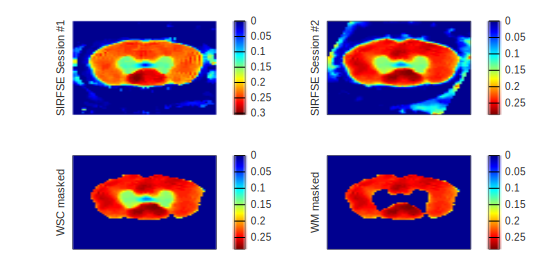

In [14]:
% ------------------ READ AND LOAD ------------------ START
warning('off');


scan = struct();
rescan = struct();
mask = struct();

scan.mwf  = cbiReadNifti('mwf_scan.nii');
scan.mtv  = cbiReadNifti('mtv_scan.nii');
scan.fsir = cbiReadNifti('Fsir_scan.nii');
scan.spgr = cbiReadNifti('Fspgr_scan.nii');

rescan.mwf  = cbiReadNifti('mwf_rescan.nii');
rescan.mtv  = cbiReadNifti('mtv_rescan.nii');
rescan.fsir = cbiReadNifti('Fsir_rescan.nii');
rescan.spgr = cbiReadNifti('Fspgr_rescan.nii');

mask.wm  = cbiReadNifti('mask_wm_scan.nii'); 
mask.sc =  cbiReadNifti('mask_wsc_scan.nii');

load MVF_histo_reg.mat; % This will load histology image which is registered on MR images. 

wmMask = logical(mask.wm.data);
scMask = logical(mask.sc.data);

% ------------------ READ AND LOAD ------------------ END 


% ------------------ INTERACT!  ------------------ START
% This section displays an example. 

% Default: SIRFSE data

% You can change scan.fsir.data & rescan.fsir.data variables
% e.g. with scan.mwf.data & rescan.mwf.data
% Please follow @ CHANGE labels. 
% ----------------------------------------------




subplot(2,2,1); imagesc(imrotate(scan.fsir.data,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('SIRFSE Session #1'); axis('off'); colormap('jet');

subplot(2,2,2); imagesc(imrotate(rescan.fsir.data,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('SIRFSE Session #2'); axis('off'); colormap('jet');

subplot(2,2,3); imagesc(imrotate(rescan.fsir.data.*scMask,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('WSC masked'); axis('off'); colormap('jet');

subplot(2,2,4); imagesc(imrotate(rescan.fsir.data.*wmMask,90)); h = colorbar; % @ CHANGE
set( h, 'YDir', 'reverse' ); ylabel('WM masked'); axis('off'); colormap('jet');

pos = get (gcf, "position"); 
pos(4) = pos(4) /1.5; 
set (gcf, "position", pos); 

% FOLLOWING SECTION IS TO SHOW SCATTER PLOTS WITH OCTAVE

%tmpvec1 = scan.fsir.data(wmMask); % @ CHANGE
%tmpvec2 = rescan.fsir.data(wmMask); % @ CHANGE
%scr = corr(tmpvec1,tmpvec2);
%figure; scatter(tmpvec1,tmpvec2);
%title(['Scan/rescan correlation (SIRFSE,WM): ' num2str(scr)]); % @ CHANGE
%xlabel('Scan'); ylabel('Rescan');
%p = polyfit(tmpvec1,tmpvec2,1);   % p returns 2 coefficients fitting r = a_1 * x + a_2
%r = p(1) .* tmpvec1 + p(2); % compute a new vector r that has matching datapoints in x
% now plot both the points in y and the curve fit in r
%hold on;
%plot(tmpvec1, r, '-');
%hold off;


%tmpvec1 = scan.fsir.data(scMask); % @ CHANGE
%tmpvec2 = rescan.fsir.data(scMask); % @ CHANGE
%scr = corr(tmpvec1,tmpvec2);
%figure; scatter(tmpvec1,tmpvec2);
%title(['Scan/rescan correlation (SIRFSE,SC): ' num2str(scr)]); % @ CHANGE
%xlabel('Scan'); ylabel('Rescan');
%p = polyfit(tmpvec1,tmpvec2,1);   % p returns 2 coefficients fitting r = a_1 * x + a_2
%r = p(1) .* tmpvec1 + p(2); % compute a new vector r that has matching datapoints in x
% now plot both the points in y and the curve fit in r
%hold on;
%plot(tmpvec1, r, '-');
%hold off;


% ------------------ INTERACT ------------------ END







<div style="background: linear-gradient(to right, #007991, #78ffd6);
            border: 1px solid black;
            border-radius: 15px;
            margin: 8px 0 8px 0;
            text-align: center;
            padding: 8px; ">
            
                 <i class="fa fa-laptop";
       style="font-size: 100px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
        
     
 
<font color='white'><center>**STEP 3: CALCULATE CORRELATIONS FOR DIFFERENT SCAN SESSIONS AND SAVE OUTPUTS**</center></font> 

<font color='white'><center>*OUTPUTS FROM THIS CELL WILL BE USED BY A PYTHON NOTEBOOK FOR VISUALIZATION*</center></font> 
            <i class="fa fa-angle-double-down"
       style="font-size: 80px;
              line-height: 100px;
              margin: 8px;
              color: white;"></i>
    <div>
   
    </div>
    </div>




### <font color='darkorange'>Correlation matrices will be calculated and visualized for two ROIs:</font>
### <font color='gray'>1) Whole spinal cord</font>
### <font color='gray'>2) White matter of the spinal cord</font>

In [17]:
% ------------------ CALCULATE WITHIN SESSIONS CORRELATION MATRIX ------------------ START



% 1) ROI: Whole spinal cord 
% 2) ROI: White matter 

imCorScan  = struct();
imCorRescan  = struct();

imCorScan(1).im = histo_reg;
imCorScan(1).name = 'Histo';
imCorScan(1).wmVec = imCorScan(1).im(wmMask);
imCorScan(1).scVec = imCorScan(1).im(scMask);
imCorScan(2).im = scan.mwf.data; %mwf_scan
imCorScan(2).name = 'MWF #1';
imCorScan(2).wmVec = imCorScan(2).im(wmMask);
imCorScan(2).scVec = imCorScan(2).im(scMask);
imCorScan(3).im = scan.mtv.data;
imCorScan(3).name = 'MTV #1';
imCorScan(3).wmVec = imCorScan(3).im(wmMask);
imCorScan(3).scVec = imCorScan(3).im(scMask);
imCorScan(4).im = scan.fsir.data;
imCorScan(4).name = 'SIRFSE #1';
imCorScan(4).wmVec = imCorScan(4).im(wmMask);
imCorScan(4).scVec = imCorScan(4).im(scMask);
imCorScan(5).im = scan.spgr.data;
imCorScan(5).name = 'SPGR #1';
imCorScan(5).wmVec = imCorScan(5).im(wmMask);
imCorScan(5).scVec = imCorScan(5).im(scMask);


fid = fopen('Scan_names.csv','wt');
if fid>0
for k=1:5
if k==1
fprintf(fid,'%s,\n%f','name');
fprintf(fid,'%s,\n%f',imCorScan(k).name);
else
fprintf(fid,'%s,\n%f',imCorScan(k).name);
end
end
fclose(fid);
end


imCorRescan(1).im = histo_reg;
imCorRescan(1).name = 'Histo';
imCorRescan(1).wmVec = imCorRescan(1).im(wmMask);
imCorRescan(1).scVec = imCorRescan(1).im(scMask);
imCorRescan(2).im = rescan.mwf.data; %mwf_rescan
imCorRescan(2).name = 'MWF #2';
imCorRescan(2).wmVec = imCorRescan(2).im(wmMask);
imCorRescan(2).scVec = imCorRescan(2).im(scMask);
imCorRescan(3).im = rescan.mtv.data;
imCorRescan(3).name = 'MTV #2';
imCorRescan(3).wmVec = imCorRescan(3).im(wmMask);
imCorRescan(3).scVec = imCorRescan(3).im(scMask);
imCorRescan(4).im = rescan.fsir.data;
imCorRescan(4).name = 'SIRFSE #2';
imCorRescan(4).wmVec = imCorRescan(4).im(wmMask);
imCorRescan(4).scVec = imCorRescan(4).im(scMask);
imCorRescan(5).im = rescan.spgr.data;
imCorRescan(5).name = 'SPGR #2';
imCorRescan(5).wmVec = imCorRescan(5).im(wmMask);
imCorRescan(5).scVec = imCorRescan(5).im(scMask);

fid = fopen('Rescan_names.csv','wt');
if fid>0
for k=1:5
if k==1
fprintf(fid,'%s,\n%f','name');
fprintf(fid,'%s,\n%f',imCorRescan(k).name);
else
fprintf(fid,'%s,\n%f',imCorRescan(k).name);
end
end
fclose(fid);
end

scanCorMatrix_wm = zeros(5,5);
scanCorMatrix_sc = zeros(5,5);
rescanCorMatrix_wm = zeros(5,5); 
rescanCorMatrix_sc = zeros(5,5); 


for i=1:5
for j=1:5
scanCorMatrix_wm(i,j) = corr(imCorScan(i).wmVec,imCorScan(j).wmVec);
scanCorMatrix_sc(i,j) = corr(imCorScan(i).scVec,imCorScan(j).scVec);
rescanCorMatrix_wm(i,j) = corr(imCorRescan(i).wmVec,imCorRescan(j).wmVec);
rescanCorMatrix_sc(i,j) = corr(imCorRescan(i).scVec,imCorRescan(j).scVec);
end
end

save -mat7-binary 'CorrelationMatrices.mat' 'scanCorMatrix_wm' 'scanCorMatrix_sc' 'rescanCorMatrix_wm' 'rescanCorMatrix_sc'
save -mat7-binary 'strData.mat' 'imCorRescan' 'imCorScan'

% ------------------ CALCULATE WITHIN SESSIONS CORRELATION MATRIX ------------------ END


% ------------------ CALCULATE BETWEEN SESSIONS CORRELATION MATRIX ------------------ START

imCor  = struct();
imCor(1).im = histo_reg;
imCor(1).name = 'Histo';
imCor(2).im = scan.mwf.data; %mwf_scan
imCor(2).name = 'MWF #1';
imCor(3).im = rescan.mwf.data; %mwf_rescan
imCor(3).name = 'MWF #2';
imCor(4).im = scan.mtv.data;
imCor(4).name = 'MTV #1';
imCor(5).im = rescan.mtv.data;
imCor(5).name = 'MTV #2';
imCor(6).im = scan.fsir.data;
imCor(6).name = 'SIRFSE #1';
imCor(7).im = rescan.fsir.data;
imCor(7).name = 'SIRFSE #2';
imCor(8).im = scan.spgr.data;
imCor(8).name = 'SPGR #1';
imCor(9).im = rescan.spgr.data;
imCor(9).name = 'SPGR #2';

a = [1 3 5 7 9];
fid = fopen('session1Names.csv','wt');
if fid>0
for k=1:5
if k==1
fprintf(fid,'%s,\n%f','name');
fprintf(fid,'%s,\n%f',imCor(a(k)).name);
else
fprintf(fid,'%s,\n%f',imCor(a(k)).name);
end
end
fclose(fid);
end

b = [1 2 4 6 8]; 
fid = fopen('session2Names.csv','wt');
if fid>0
for k=1:5
if k==1
fprintf(fid,'%s,\n%f','name');
fprintf(fid,'%s,\n%f',imCor(b(k)).name);
else
fprintf(fid,'%s,\n%f',imCor(b(k)).name);
end
end
fclose(fid);
end


[A,B] = meshgrid(a,b);
c=cat(2,A',B');
d=reshape(c,[],2);

wmCor_coef = zeros(length(d),1);
for i=1:length(d)
v1 = imCor(d(i,1)).im;
v2 = imCor(d(i,2)).im;
wmCor_coef(i,1) = corr(v1(wmMask),v2(wmMask));
scCor_coef(i,1) = corr(v1(scMask),v2(scMask));
end


wmCor_matrix = reshape(wmCor_coef,[5 5]);
scCor_matrix = reshape(scCor_coef,[5 5]);

save -mat7-binary 'betweenSessionCM.mat' 'wmCor_matrix' 'scCor_matrix' 'imcor'


% ------------------ CALCULATE BETWEEN SESSIONS CORRELATION MATRIX ------------------ END

disp('==================================================');
disp('RESULTS HAVE BEEN SAVED. PLEASE OPEN THE SECOND NOTEBOOK!');
disp('==================================================');

% ------------------ DISPLAY CORRELATION MATRICES ON OCTAVE ------------------ START
%imagesc(scanCorMatrix_wm); colormap('jet')
%h = colorbar;
%set( h, 'YDir', 'reverse' );
%textStrings = num2str(scCor_matrix(:),'%0.2f');  %# Create strings from the matrix values
%textStrings = strtrim(cellstr(textStrings));  %# Remove any space padding
%[x,y] = meshgrid(1:5);   %# Create x and y coordinates for the strings
%hStrings = text(x(:),y(:),textStrings(:),...      %# Plot the strings
%                'HorizontalAlignment','center');
%midValue = mean(get(gca,'CLim'));  %# Get the middle value of the color range
%set(hStrings,'color',[0 0 0]);
%set(hStrings,'fontweight','bold');

%set(gca,'XTick',1:5,...                         %# Change the axes tick marks
%        'XTickLabel',{'Histo Scan','MWF Scan','MTV Scan','SIRFSE Scan','SPGR Scan'},...  %#   and tick labels
%        'YTick',1:5,...
%        'YTickLabel',{'Histo Scan','MWF Scan','MTV Scan','SIRFSE Scan','SPGR Scan'},...
%        'TickLength',[0 0]);
%title('WM Scan');


%figure();
%imagesc(rescanCorMatrix_sc); colormap('jet')
%h = colorbar;
%set( h, 'YDir', 'reverse' );
%textStrings = num2str(wmCor_matrix(:),'%0.2f');  %# Create strings from the matrix values
%textStrings = strtrim(cellstr(textStrings));  %# Remove any space padding
%[x,y] = meshgrid(1:5);   %# Create x and y coordinates for the strings
%hStrings = text(x(:),y(:),textStrings(:),...      %# Plot the strings
%                'HorizontalAlignment','center');
%midValue = mean(get(gca,'CLim'));  %# Get the middle value of the color range
%set(hStrings,'color',[0 0 0]);
%set(hStrings,'fontweight','bold');

%set(gca,'XTick',1:5,...                         %# Change the axes tick marks
%        'XTickLabel',{'Histo','MWF','MTV','SIRFSE','SPGR'},...  %#   and tick labels
%        'YTick',1:5,...
%        'YTickLabel',{'Histo','MWF','MTV','SIRFSE','SPGR'},...
%        'TickLength',[0 0]);
%title('SC Rescan');

% ------------------ DISPLAY ------------------ END



RESULTS HAVE BEEN SAVED. PLEASE OPEN THE SECOND NOTEBOOK!


<center><i class="fa fa-university" aria-hidden="true" style="font-size: 80px; text-align: center; padding: 8px"></i></center>
<center>The MIT License (MIT)</center>

<center>Copyright (c) 2014 Ecole Polytechnique, Université de Montréal</center>

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.


<img src="https://avatars3.githubusercontent.com/u/7755716?v=4&s=200" align="center" style="width:128px;height:128px;">

